In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df_train = pd.read_csv('../2. Data Preprocessing/processed_tmdb_data.csv')

print(df_train.columns)

Index(['budget', 'action', 'adventure', 'fantasy', 'science fiction', 'comedy',
       'crime', 'drama', 'mystery', 'thriller',
       ...
       'prosthetic makeup artist', 'special guest director',
       'lead set dresser', 'set dressing production assistant',
       'vfx production coordinator', 'radio play', 'tattoo designer',
       'tattooist', 'additional still photographer',
       'mechanical & creature designer'],
      dtype='object', length=574)


In [3]:
# Check the columns using dtypes
print(df_train.dtypes)
df_train.shape

budget                                                        int64
action                                                        int64
adventure                                                     int64
fantasy                                                       int64
science fiction                                               int64
comedy                                                        int64
crime                                                         int64
drama                                                         int64
mystery                                                       int64
thriller                                                      int64
romance                                                       int64
war                                                           int64
horror                                                        int64
animation_x                                                   int64
family                                          

(11664, 574)

In [31]:
# New df for non-text columns
df = df_train.loc[:, ["budget", "popularity", "production_companies", "production_countries", "weekday", "day", "month", "year", "revenue", "runtime", "vote_average", "vote_count", "weighted_rating", "malecastsnum", "femalecastsnum", "unknowngendercastsnum", "totalcasts", "malecrewsnum", "femalecrewsnum", "unknowngendercrewsnum", "totalcrews"]]
# Remove rows where revenue = 0
df = df[df.revenue != 0]
# Remove rows where year < 1980
df = df[df.year >= 1980]

# total number of rows and columns
print(df.shape)
# Randomly sample 5 records with .sample(5)
df.sample(5)

(5091, 21)


budget  popularity  production_companies  production_countries  \
9150   40000000    8.978408                     5                     3   
5134   25000000    5.890000                     2                     1   
10629         0    7.288352                     1                     1   
6312          0    4.267000                     2                     1   
9886   20000000    7.499639                     1                     1   

       weekday   day  month    year   revenue  runtime     ...      \
9150       4.0   3.0    7.0  2008.0   7400000    125.0     ...       
5134       5.0  14.0    8.0  1992.0  10736401     87.0     ...       
10629      5.0  23.0    4.0  2004.0  10000000    109.0     ...       
6312       5.0  29.0    6.0  1990.0  24707633     84.0     ...       
9886       5.0  22.0   11.0  2002.0  33526835     85.0     ...       

       vote_count  weighted_rating  malecastsnum  femalecastsnum  \
9150           52         6.998962           2.0             2.0   
5134           70         6.997208           7.0             4.0   
10629          34         6.998370           3.0             1.0   
6312           78         6.992846           9.0             3.0   
9886          100         6.996016           8.0             3.0   

       unknowngendercastsnum  totalcasts  malecrewsnum  femalecrewsnum  \
9150                     0.0         4.0           1.0             0.0   
5134                     0.0        11.0           8.0             1.0   
10629                    1.0         5.0           2.0             1.0   
6312                     2.0        14.0           8.0             1.0   
9886                     1.0        12.0          10.0             0.0   

       unknowngendercrewsnum  totalcrews  
9150                     1.0         2.0  
5134                     3.0        12.0  
10629                    2.0         5.0  
6312                     3.0        12.0  
9886                     2.0        12.0  

[5 rows x 21 columns]

In [32]:
# Get summary statistics using .describe()
df.describe()
#df_train[["budget", "popularity", "production_companies", "production_countries", "revenue", "runtime", "vote_average", "vote_count", "weighted_rating", "malecastsnum", "femalecastsnum", "unknowngendercastsnum", "totalcasts", "malecrewsnum", "femalecrewsnum", "unknowngendercrewsnum", "totalcrews"]].describe()

budget   popularity  production_companies  production_countries  \
count  5.091000e+03  5091.000000           5091.000000           5091.000000   
mean   2.937001e+07    20.058224              2.995875              1.378708   
std    3.984256e+07    29.692742              2.063954              0.794115   
min    0.000000e+00     0.019984              0.000000              0.000000   
25%    2.000000e+06     5.916000              2.000000              1.000000   
50%    1.500000e+07     9.830000              3.000000              1.000000   
75%    4.000000e+07    25.309153              4.000000              2.000000   
max    3.800000e+08   875.581305             26.000000             12.000000   

           weekday          day        month         year       revenue  \
count  5091.000000  5091.000000  5091.000000  5091.000000  5.091000e+03   
mean      4.270674    15.409546     6.896288  2002.574740  8.593037e+07   
std       1.283338     8.486405     3.332204     9.599938  1.613036e+08   
min       1.000000     1.000000     1.000000  1980.000000  1.000000e+00   
25%       3.000000     8.000000     4.000000  1996.000000  5.984466e+06   
50%       5.000000    15.000000     7.000000  2005.000000  2.816967e+07   
75%       5.000000    22.000000    10.000000  2011.000000  9.403066e+07   
max       7.000000    31.000000    12.000000  2016.000000  2.787965e+09   

           runtime     ...         vote_count  weighted_rating  malecastsnum  \
count  5091.000000     ...        5091.000000      5091.000000   2094.000000   
mean    106.963858     ...         742.722844         6.991435      8.114136   
std      18.757345     ...        1235.835357         0.035841      4.878736   
min       0.000000     ...           0.000000         6.715498      0.000000   
25%      94.000000     ...         112.000000         6.983174      5.000000   
50%     104.000000     ...         306.000000         6.994649      7.000000   
75%     117.000000     ...         782.500000         6.999119     11.000000   
max     338.000000     ...       13752.000000         7.390359     45.000000   

       femalecastsnum  unknowngendercastsnum   totalcasts  malecrewsnum  \
count     2094.000000            2094.000000  2094.000000   2094.000000   
mean         4.189589               3.851003    16.154728      8.055396   
std          2.969484               4.904609     8.957133      5.668986   
min          0.000000               0.000000     0.000000      0.000000   
25%          2.000000               1.000000    10.000000      4.000000   
50%          4.000000               2.000000    15.000000      7.000000   
75%          6.000000               5.000000    20.000000     11.000000   
max         23.000000              58.000000   102.000000     67.000000   

       femalecrewsnum  unknowngendercrewsnum   totalcrews  
count     2094.000000            2094.000000  2094.000000  
mean         2.194365              10.376791    20.626552  
std          2.503881              15.977853    21.104816  
min          0.000000               0.000000     0.000000  
25%          0.000000               2.000000     8.000000  
50%          1.000000               5.000000    14.000000  
75%          3.000000              11.000000    25.000000  
max         31.000000             146.000000   193.000000  

[8 rows x 21 columns]

In [33]:
# Missing Values Summary
# total row counts
df['runtime'].value_counts()
print(df.count())

# NaN values count
print(df.isna().sum())

# Zero values count
print((df == 0).sum())

budget                   5091
popularity               5091
production_companies     5091
production_countries     5091
weekday                  5091
day                      5091
month                    5091
year                     5091
revenue                  5091
runtime                  5091
vote_average             5091
vote_count               5091
weighted_rating          5091
malecastsnum             2094
femalecastsnum           2094
unknowngendercastsnum    2094
totalcasts               2094
malecrewsnum             2094
femalecrewsnum           2094
unknowngendercrewsnum    2094
totalcrews               2094
dtype: int64
budget                      0
popularity                  0
production_companies        0
production_countries        0
weekday                     0
day                         0
month                       0
year                        0
revenue                     0
runtime                     0
vote_average                0
vote_count                 

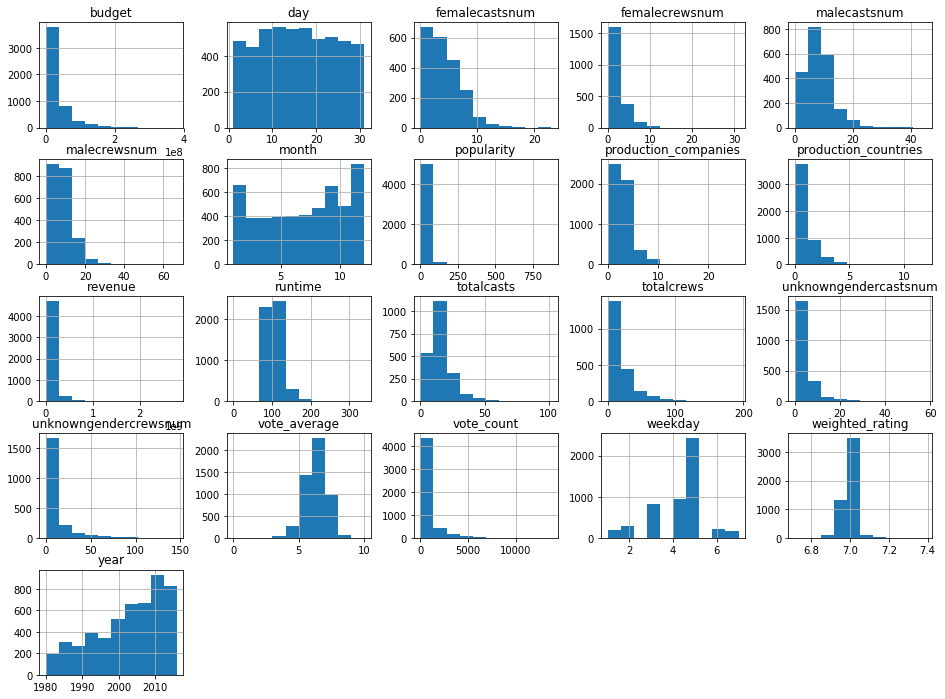

In [34]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [16,12]
# Plot histograms for all attributes
df.hist()
plt.show()

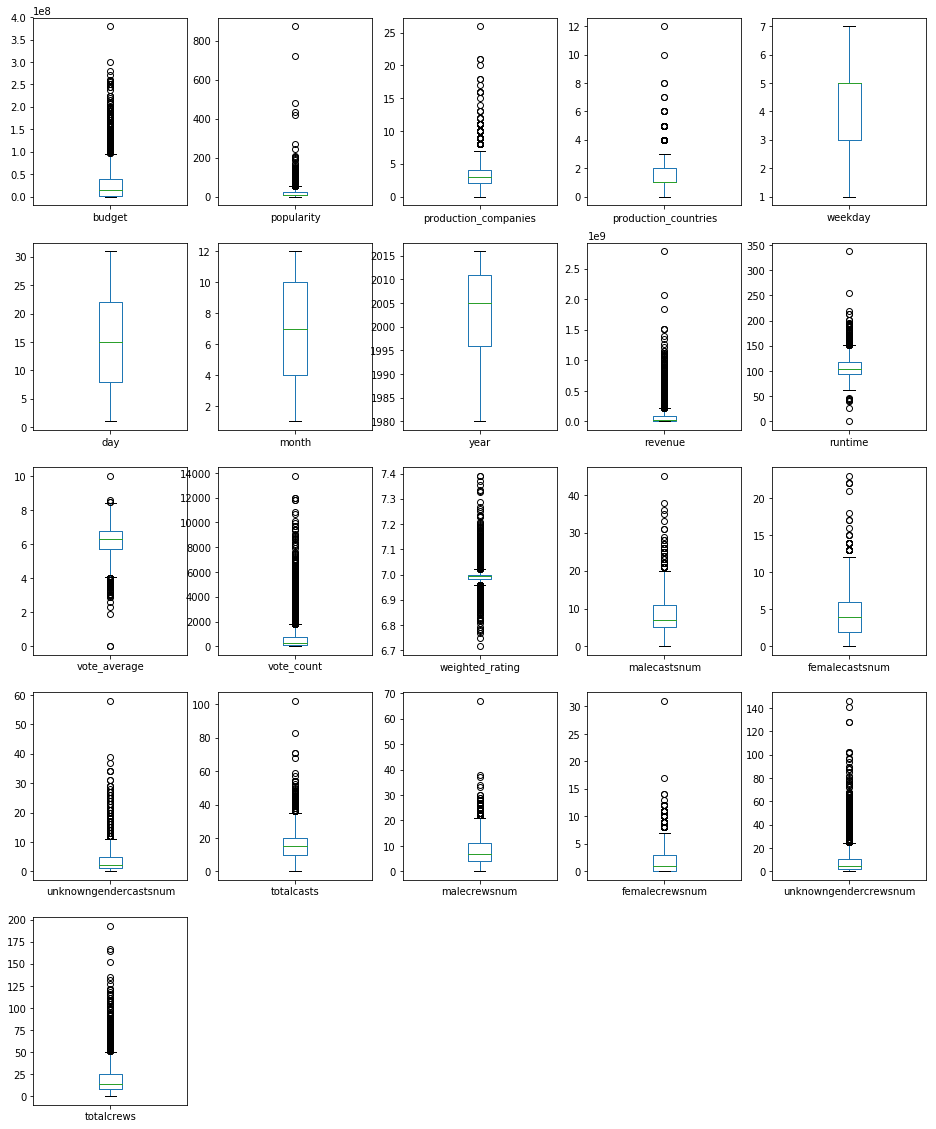

In [35]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [16,20]
# Plot boxplots for all attributes
df.plot(kind='box', subplots=True, layout=(5,5))
plt.show()

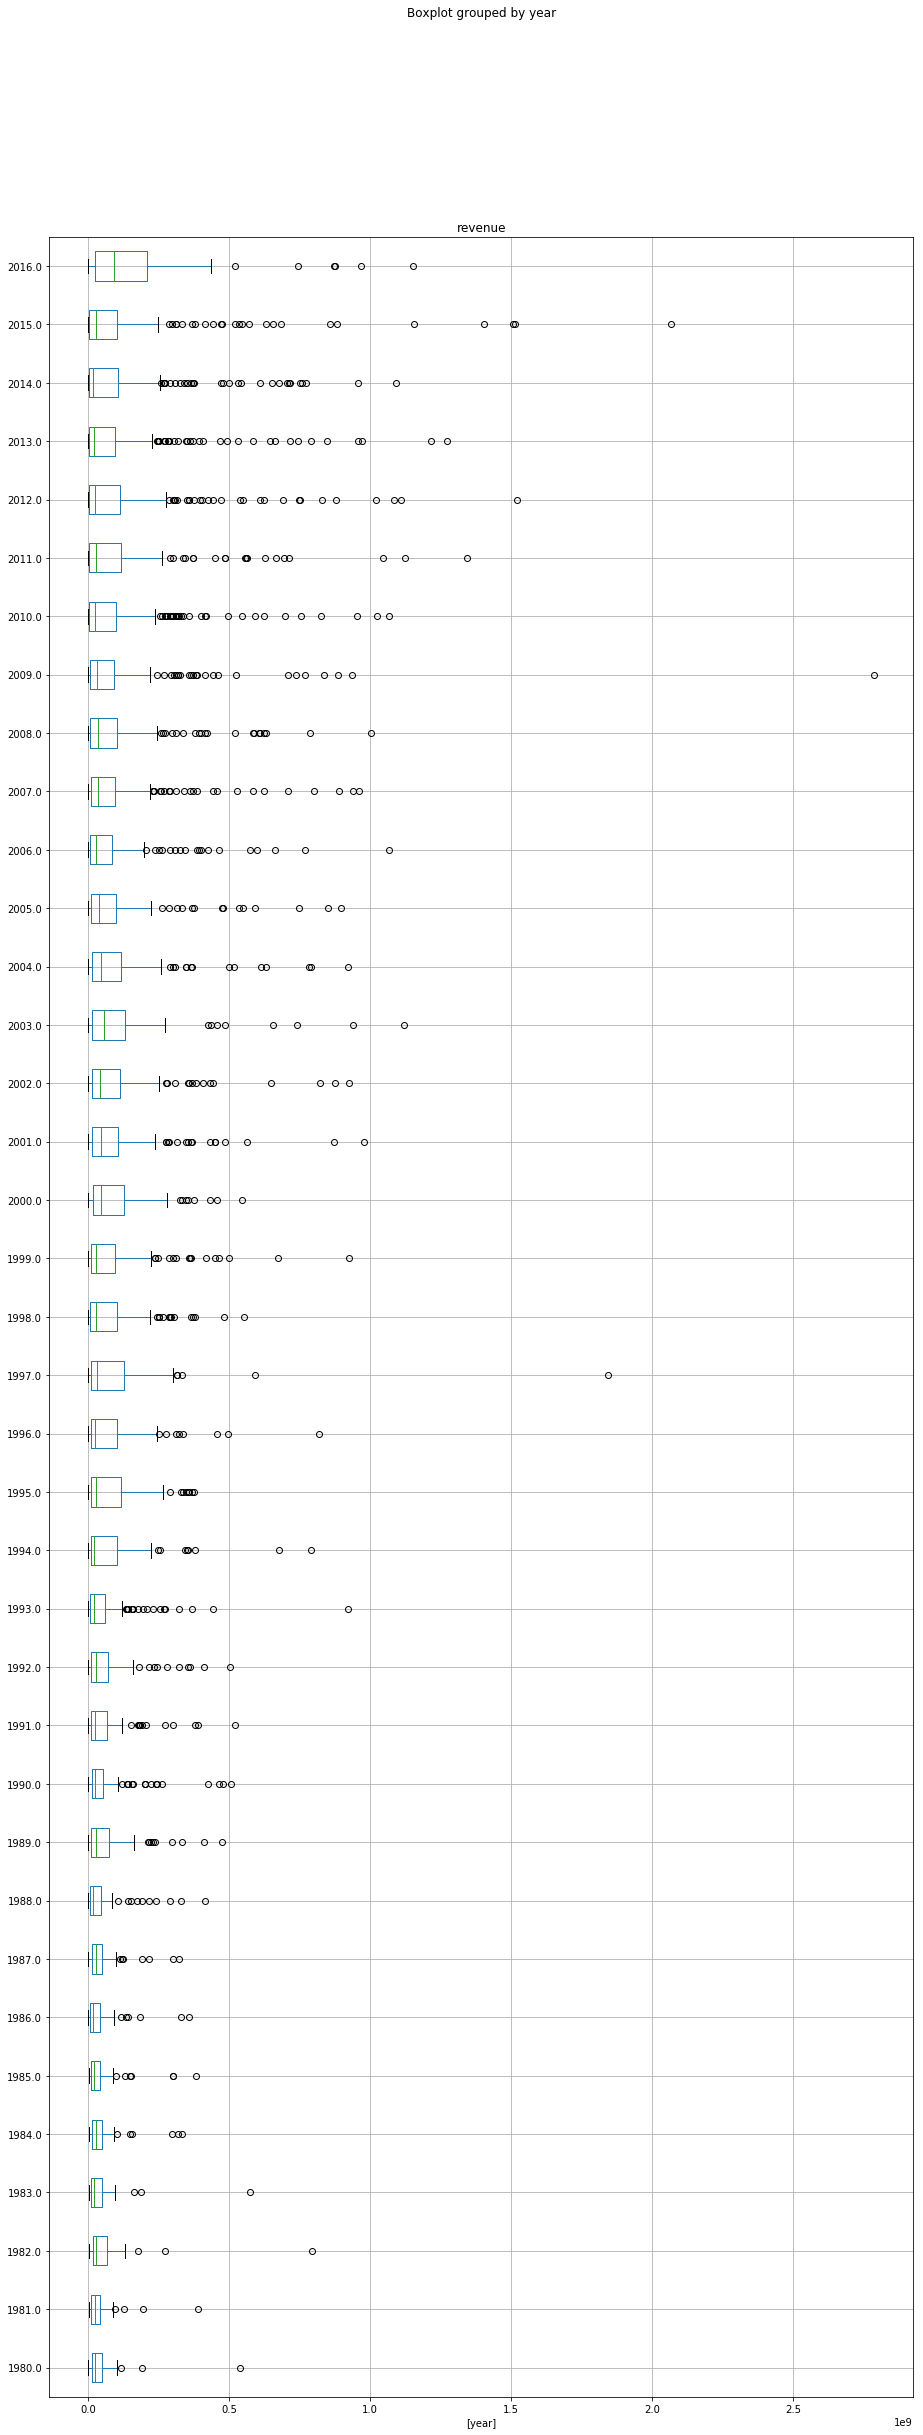

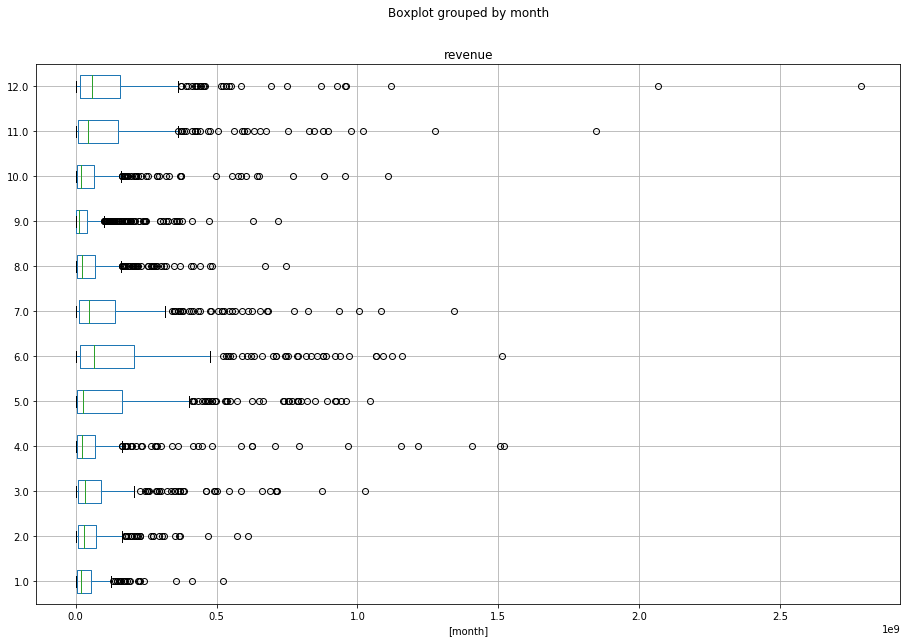

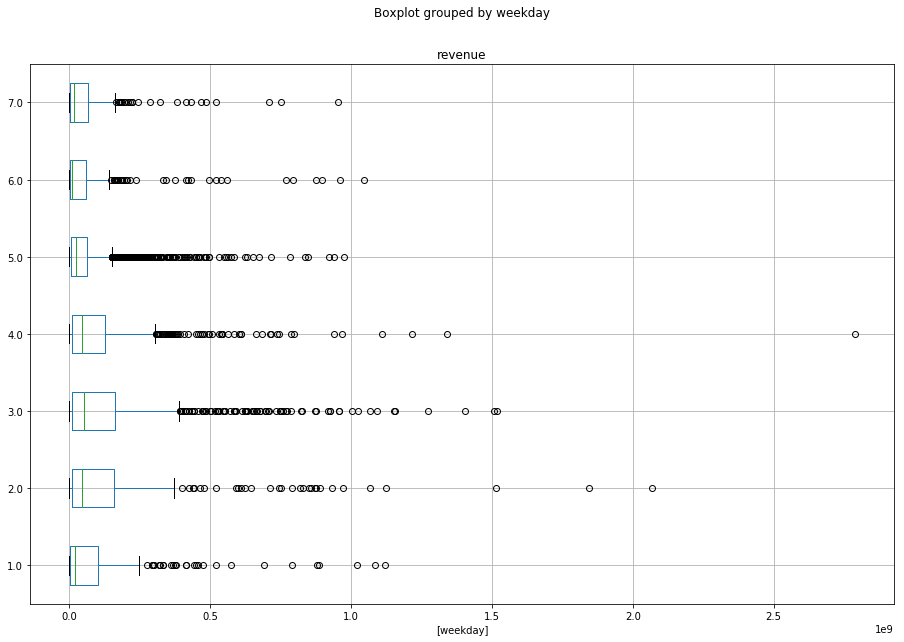

In [36]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [15, 40]
# Plot a boxplot for a specific attributes
df[['revenue', "year"]].boxplot(vert=False, by='year')
plt.show()

# Set the size of the figure
plt.rcParams["figure.figsize"] = [15, 10]
# Plot a boxplot for a specific attributes
df[['revenue', "month"]].boxplot(vert=False, by='month')
plt.show()

# Set the size of the figure
plt.rcParams["figure.figsize"] = [15, 10]
# Plot a boxplot for a specific attributes
df[['revenue',"weekday"]].boxplot(vert=False, by='weekday')
plt.show()

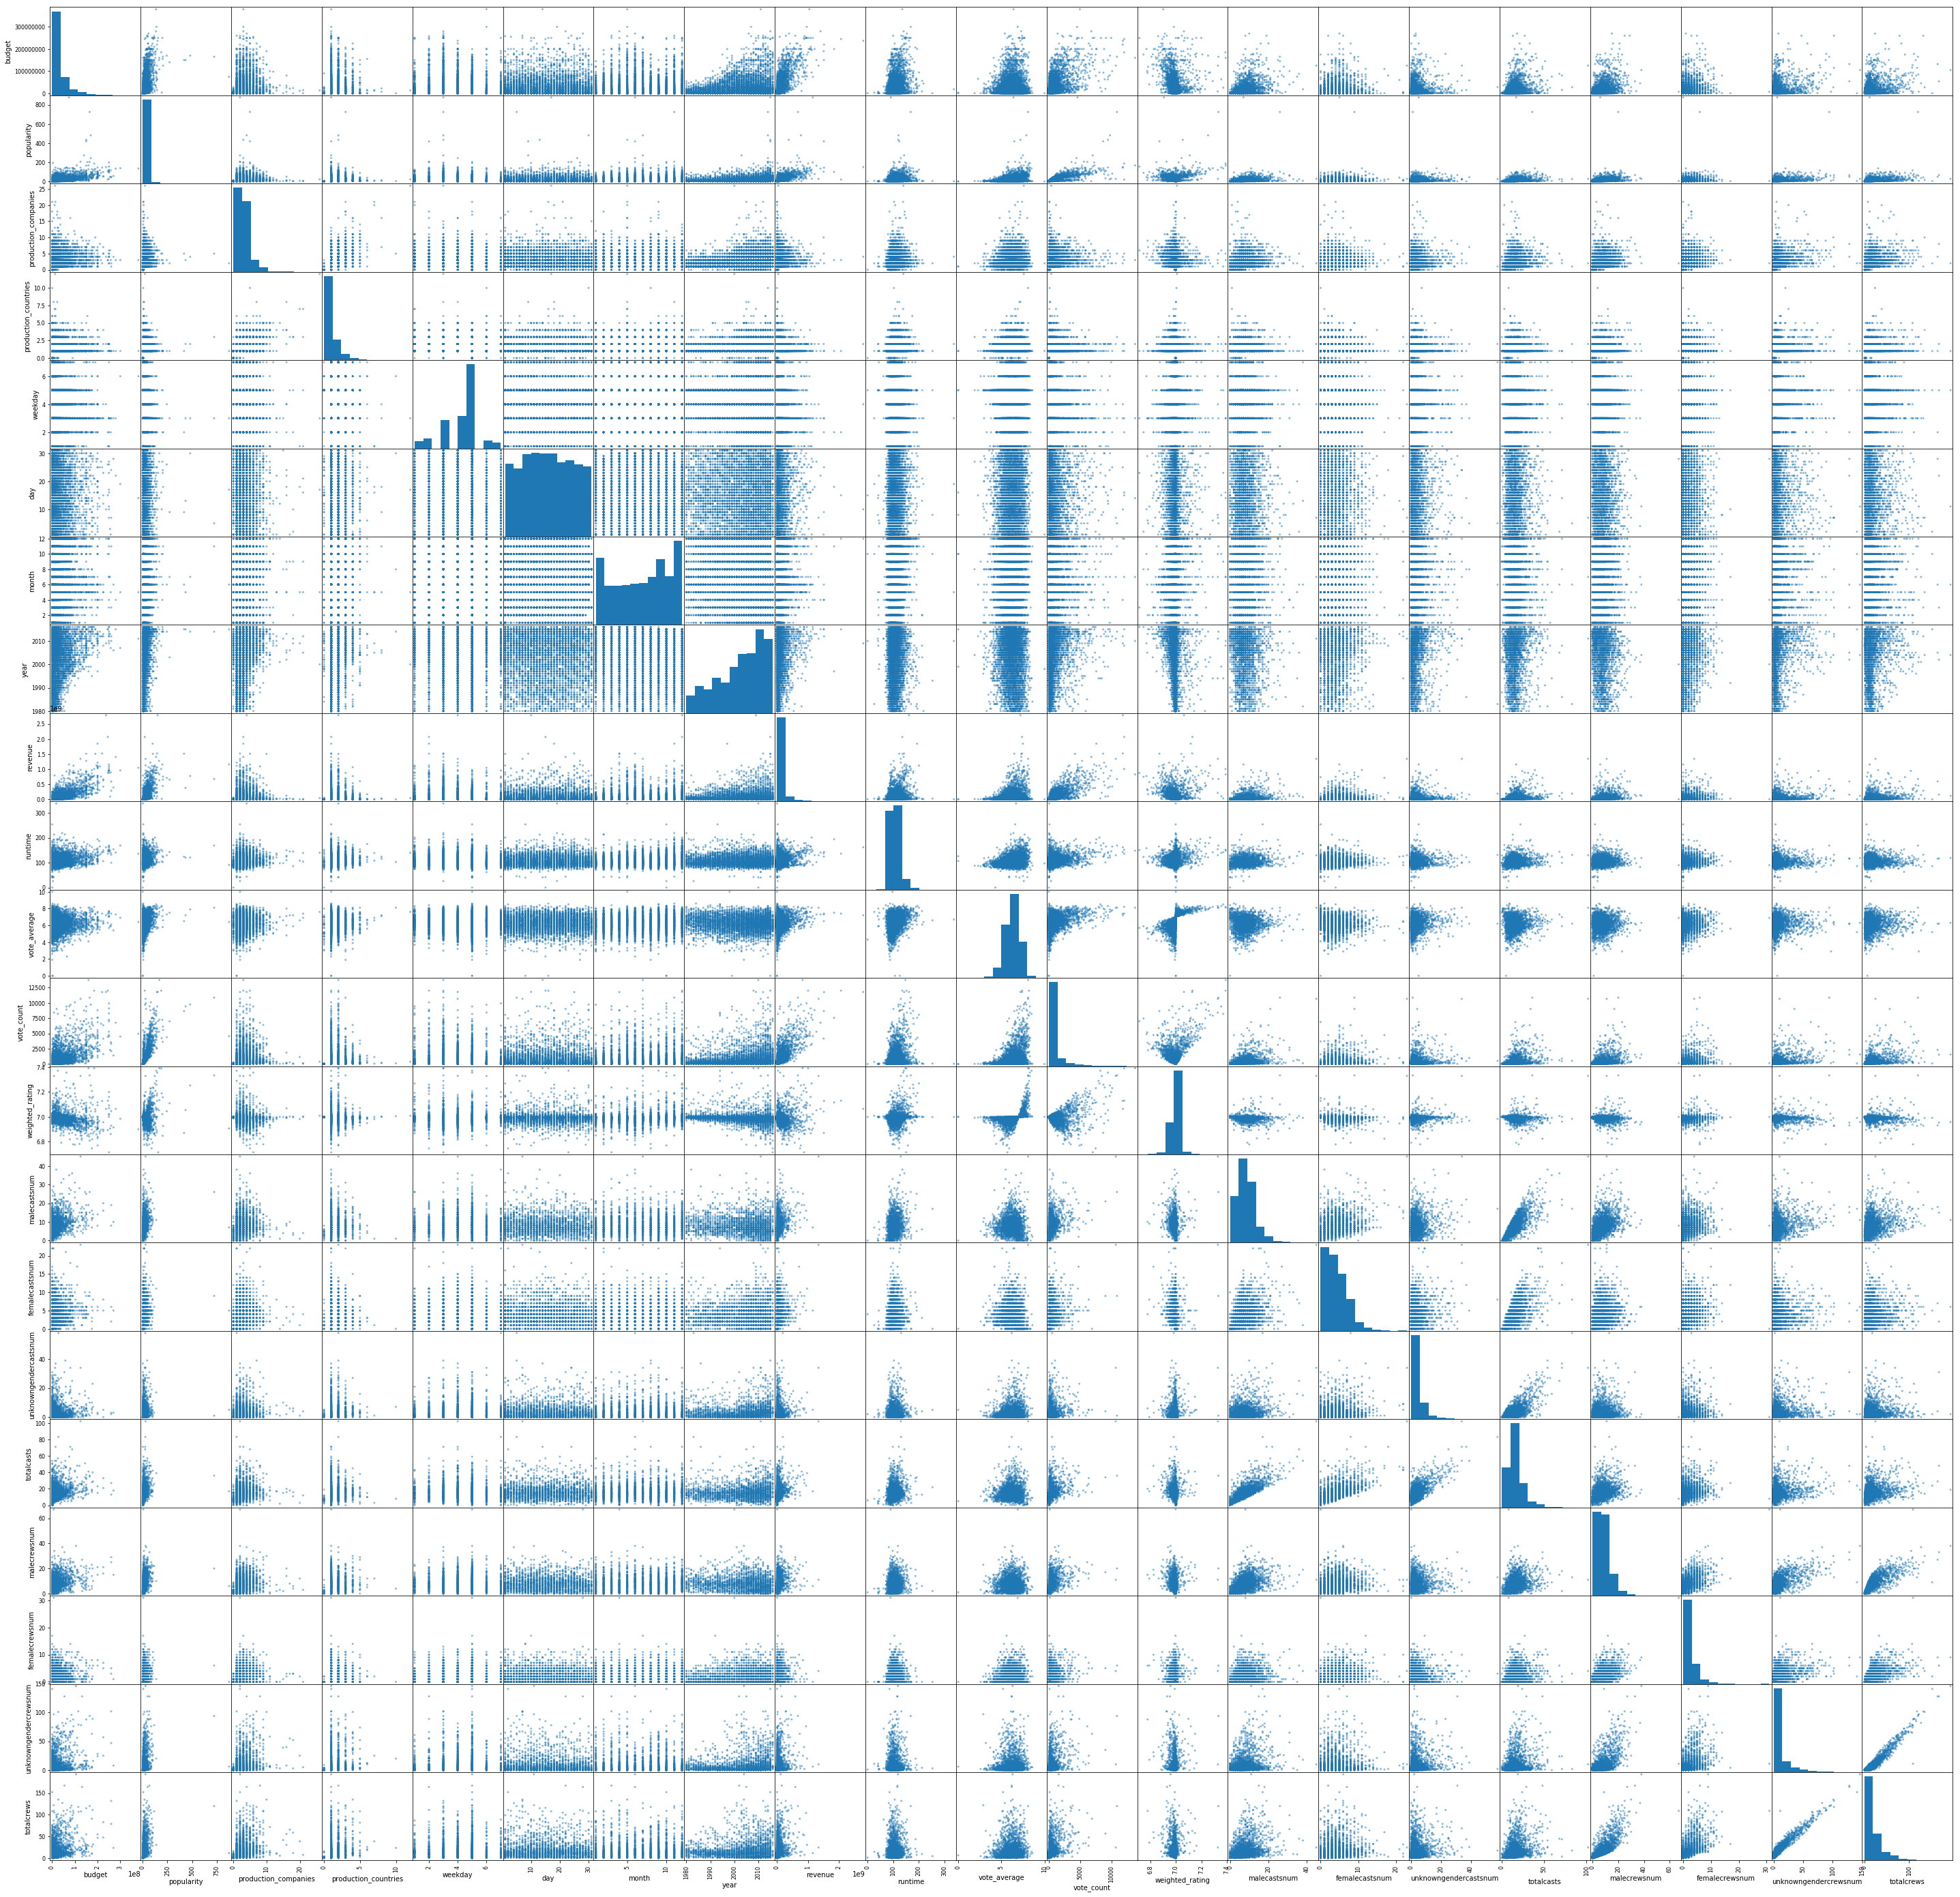

In [37]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [50,50]
# Plot scatter
pd.plotting.scatter_matrix(df)
plt.show()

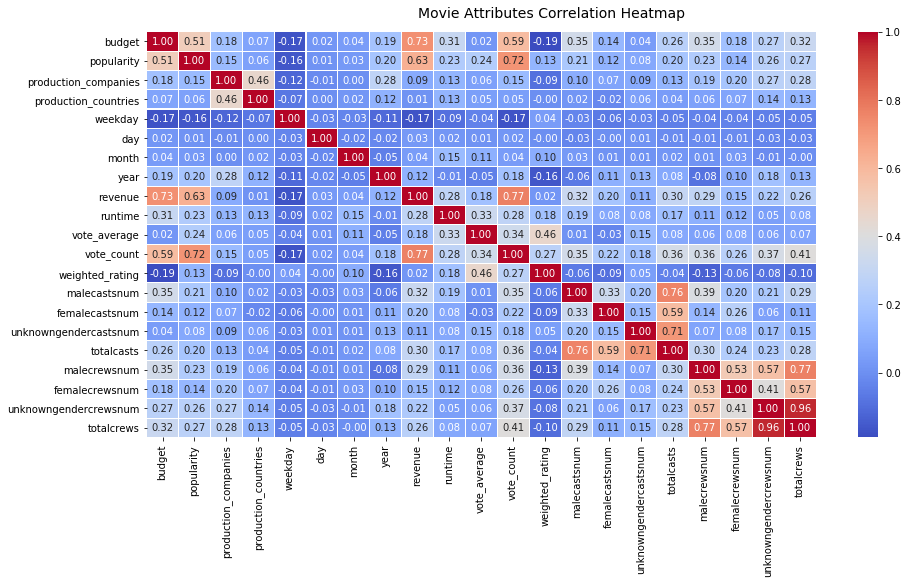

In [38]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Movie Attributes Correlation Heatmap', fontsize=14)

In [39]:
#descriptive statistics summary - sub in values to try
df['revenue'].describe()

count    5.091000e+03
mean     8.593037e+07
std      1.613036e+08
min      1.000000e+00
25%      5.984466e+06
50%      2.816967e+07
75%      9.403066e+07
max      2.787965e+09
Name: revenue, dtype: float64

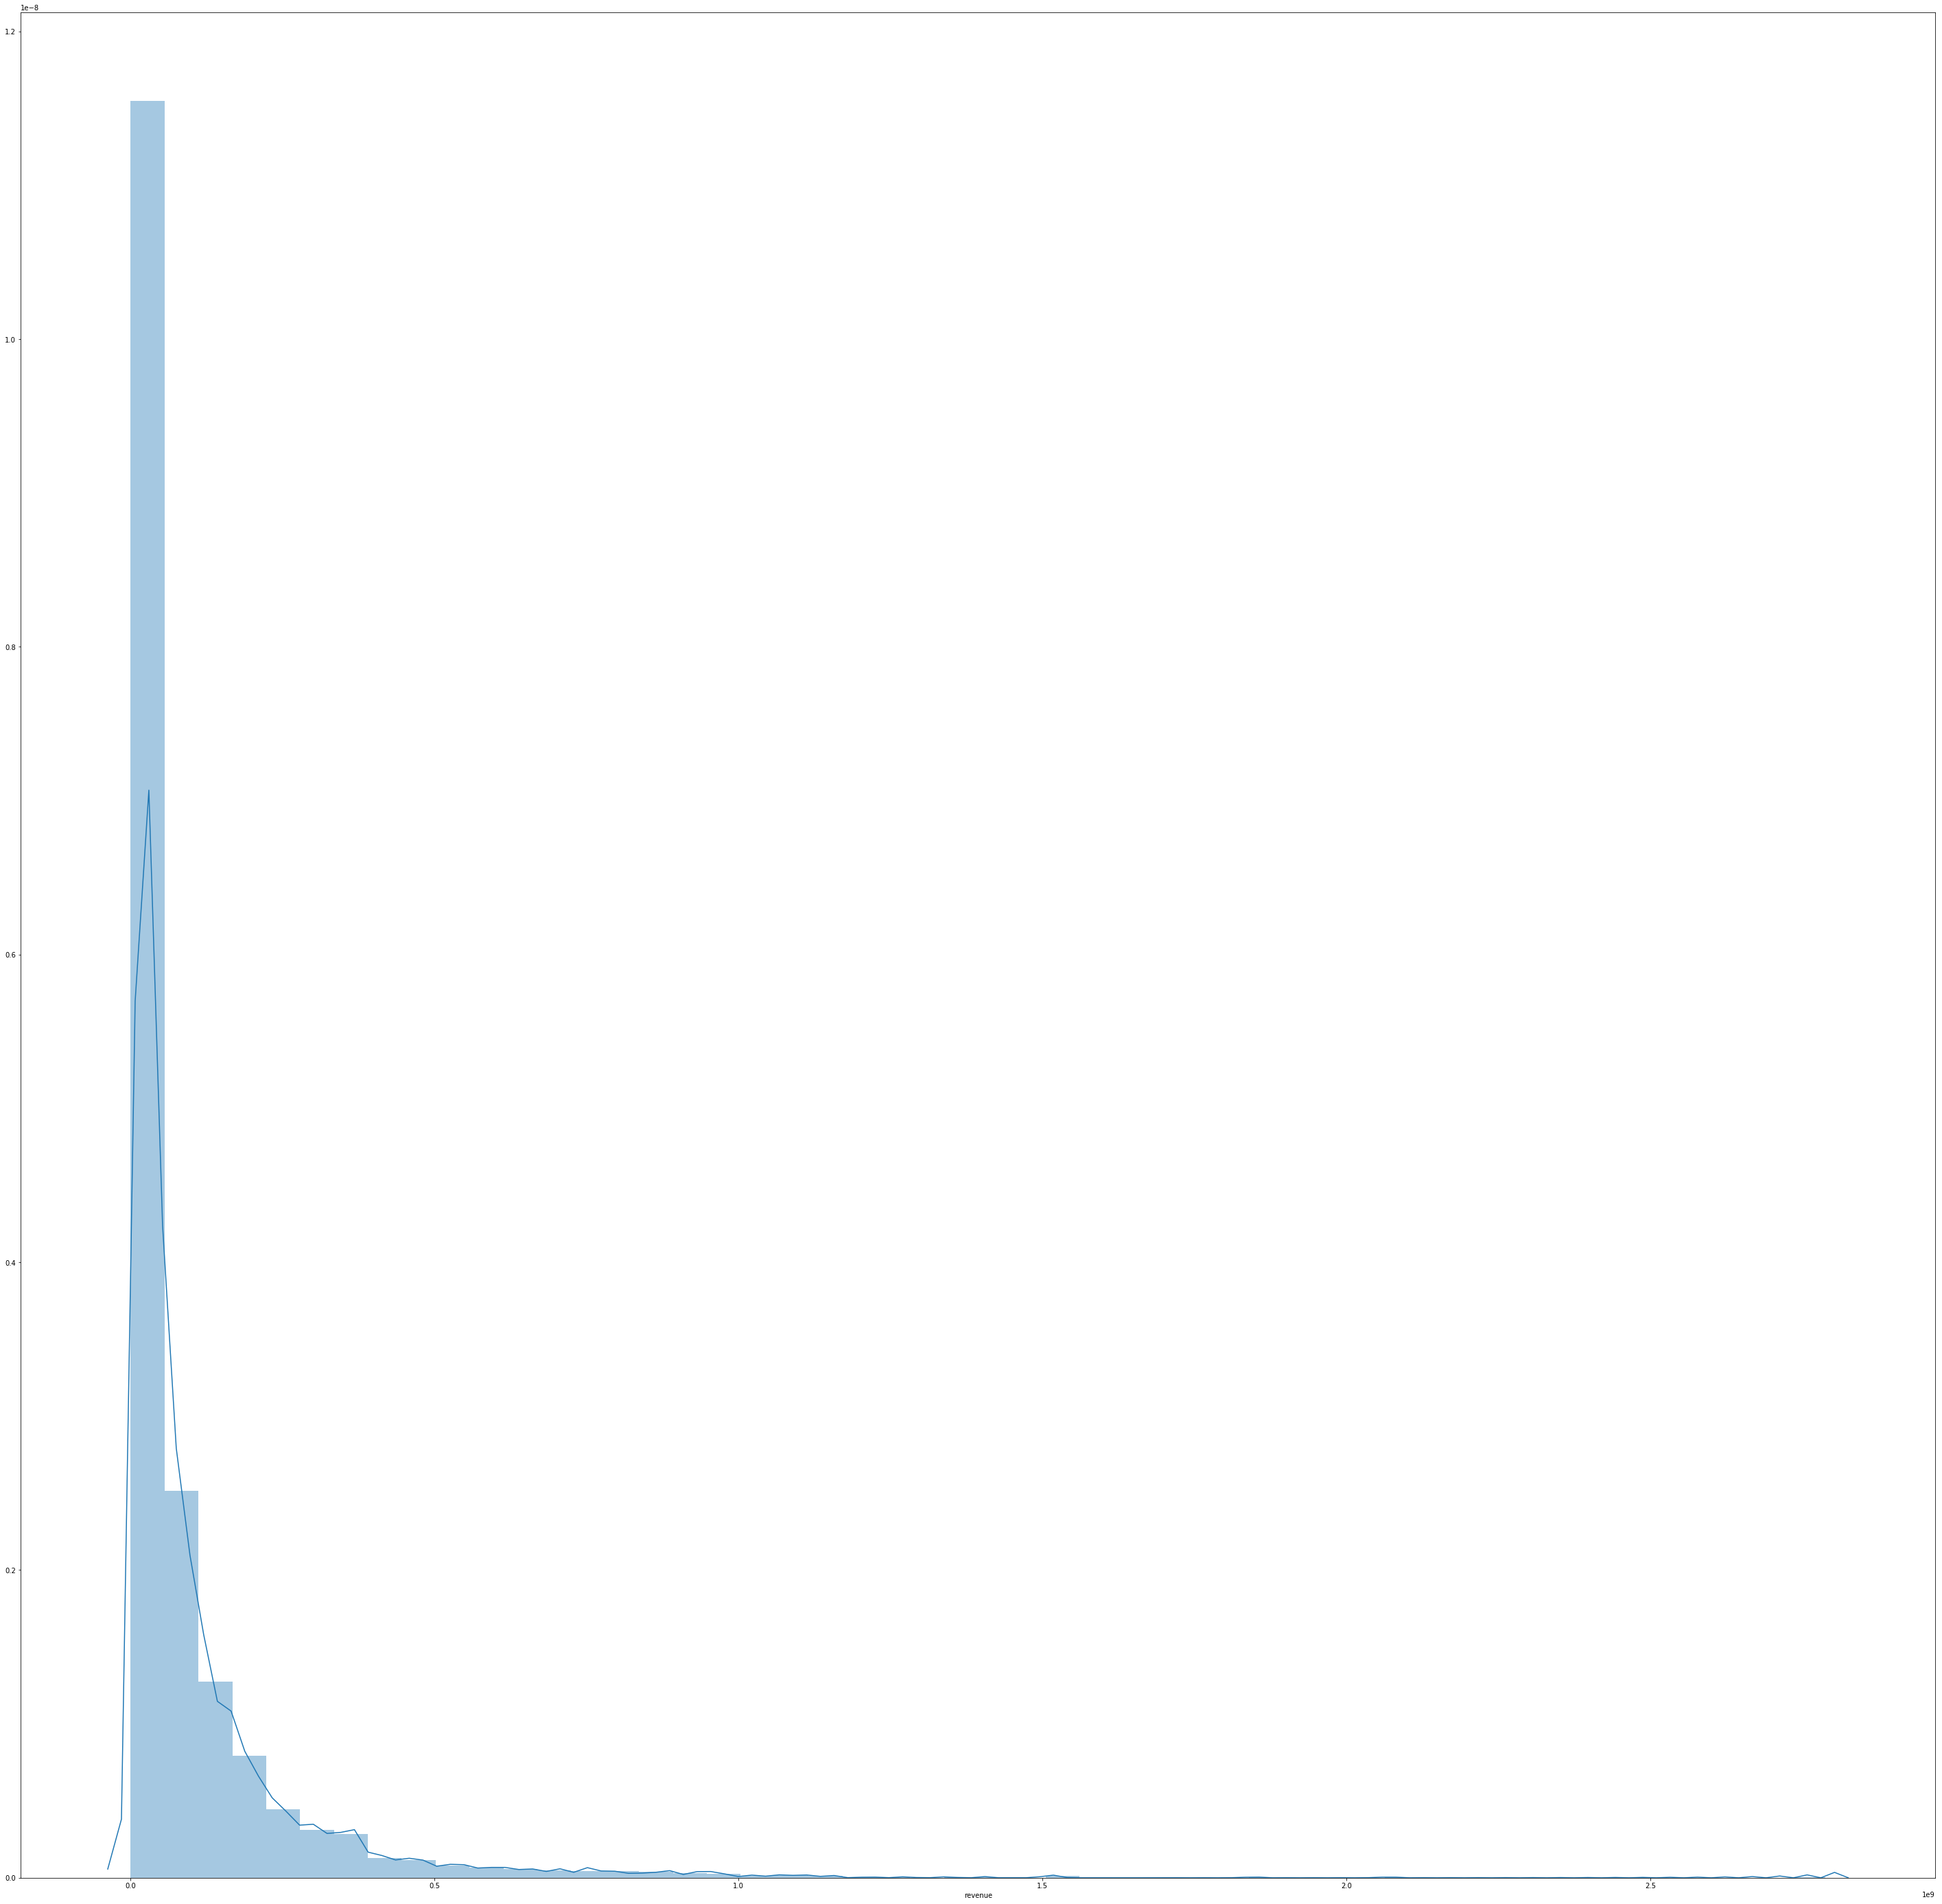

In [40]:
#histogram - sub in values to try
sns.distplot(df['revenue']);

In [41]:
#skewness and kurtosis - sub in values to try
print("Skewness: %f" % df['revenue'].skew())
print("Kurtosis: %f" % df['revenue'].kurt()) # peak sharpness

Skewness: 4.735459
Kurtosis: 37.310174


In [42]:
# Outlier detection method (3 sd)
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [43]:
# Outlier detection
outlier_datapoints = detect_outlier(df['popularity'])
# print(outlier_datapoints)
print("popularity")
print("Number of Outliers: %d" % len(outlier_datapoints))
print("Number of Data Points: %d" % len(df['popularity']))

outlier_datapoints = detect_outlier(df['budget'])
# print(outlier_datapoints)
print("budget")
print("Number of Outliers: %d" % len(outlier_datapoints))
print("Number of Data Points: %d" % len(df['budget']))

outlier_datapoints = detect_outlier(df['revenue'])
# print(outlier_datapoints)
print("revenue")
print("Number of Outliers: %d" % len(outlier_datapoints))
print("Number of Data Points: %d" % len(df['revenue']))

outlier_datapoints = detect_outlier(df['runtime'])
# print(outlier_datapoints)
print("runtime")
print("Number of Outliers: %d" % len(outlier_datapoints))
print("Number of Data Points: %d" % len(df['runtime']))

outlier_datapoints = detect_outlier(df['weighted_rating'])
# print(outlier_datapoints)
print("weighted_rating")
print("Number of Outliers: %d" % len(outlier_datapoints))
print("Number of Data Points: %d" % len(df['weighted_rating']))

popularity
Number of Outliers: 62
Number of Data Points: 5091
budget
Number of Outliers: 209
Number of Data Points: 5091
revenue
Number of Outliers: 329
Number of Data Points: 5091
runtime
Number of Outliers: 400
Number of Data Points: 5091
weighted_rating
Number of Outliers: 515
Number of Data Points: 5091
